# Load and Understand the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load dataset
file_path = "C:/Users/harsh/OneDrive/Desktop/Unified Mentor/blood.csv"
df = pd.read_csv(file_path)

# Dataset overview
print("--- Dataset Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- First 5 Rows ---")
print(df.head())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB

--- Descriptive Statistics ---
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.826781   24.380307    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.0

# EXPLORATORY DATA ANALYSIS (EDA)

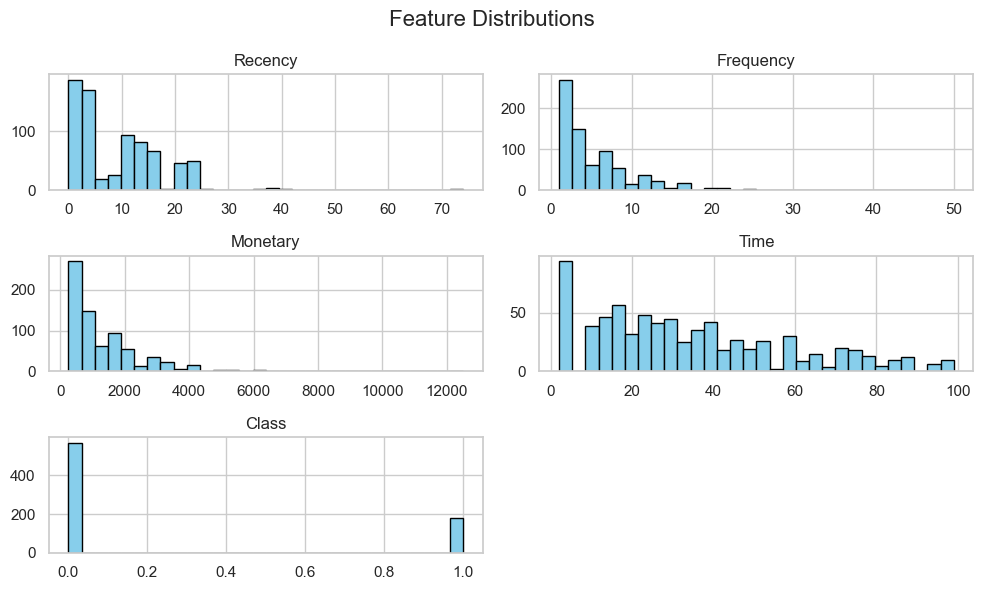

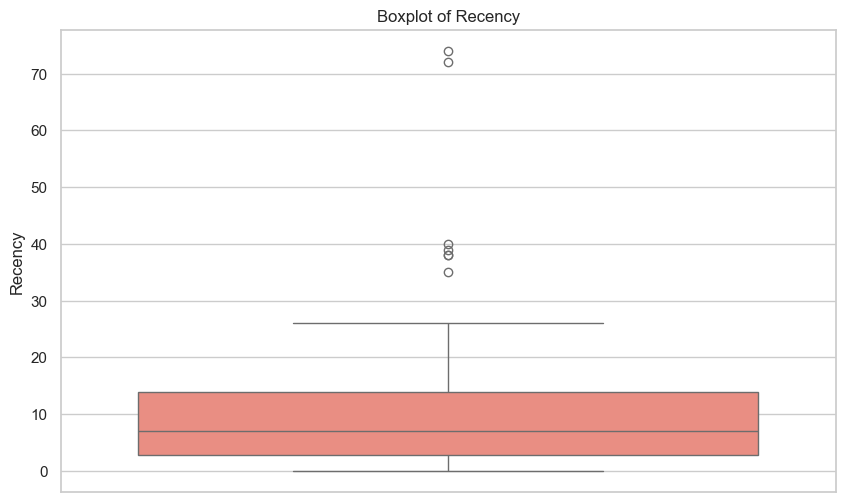

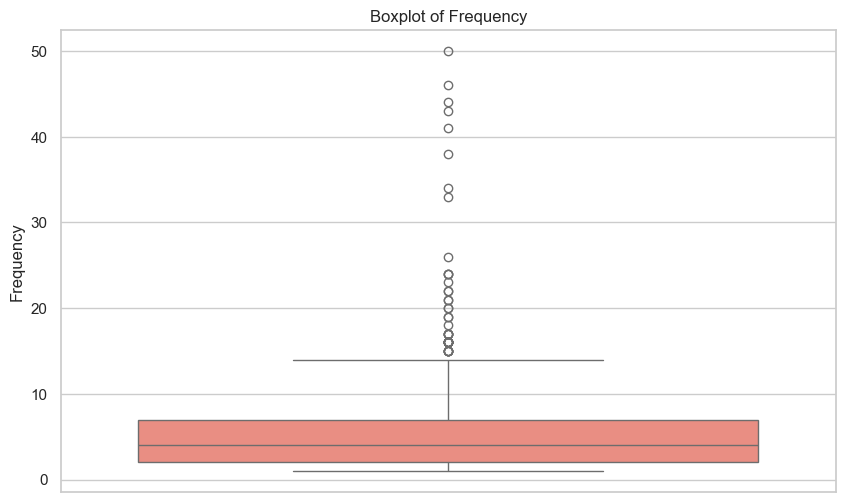

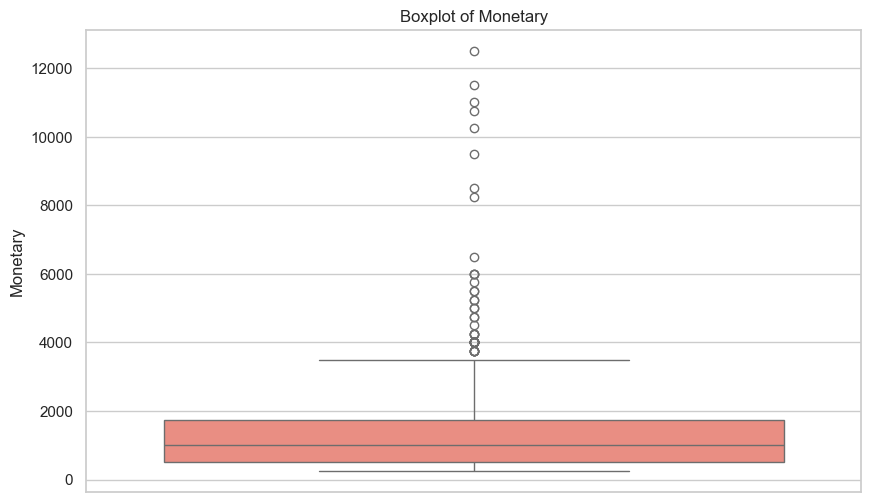

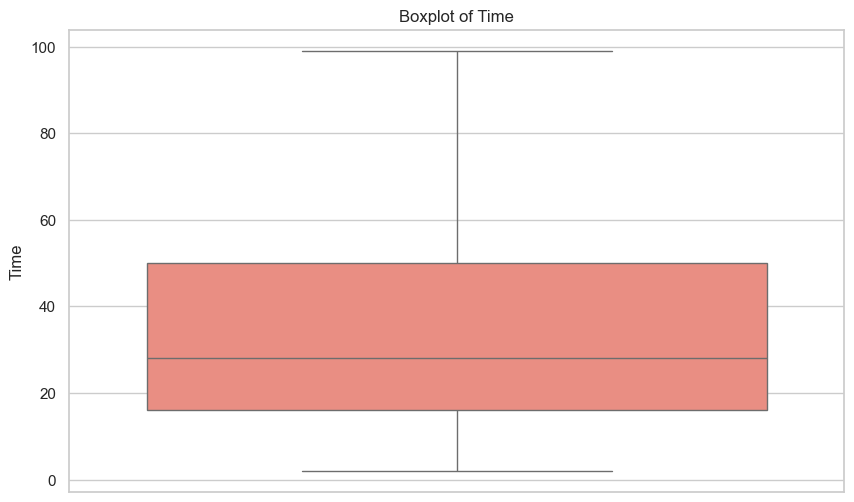

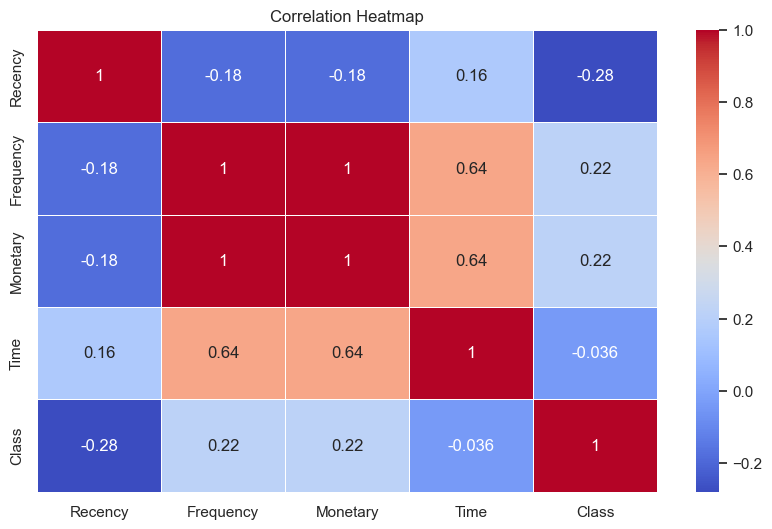

C:\Users\harsh\AppData\Local\Temp\ipykernel_16688\1356548238.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


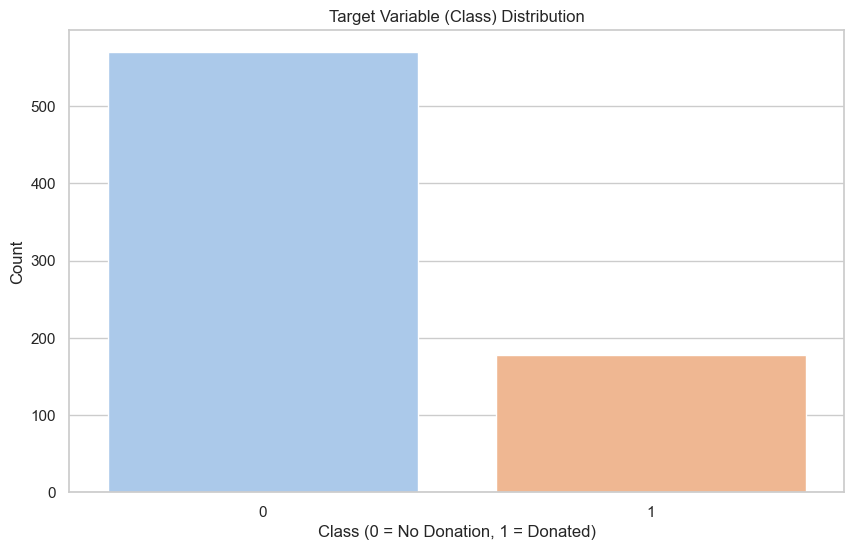

In [3]:
# Histograms – Distribution of each feature
df.hist(bins=30, edgecolor='black', color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots – Detecting outliers
for col in df.columns[:-1]:  # Skip 'Class' as it's categorical
    sns.boxplot(y=df[col], color='salmon')
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Class Distribution – Target Imbalance
sns.countplot(x='Class', data=df, palette='pastel')
plt.title("Target Variable (Class) Distribution")
plt.xlabel("Class (0 = No Donation, 1 = Donated)")
plt.ylabel("Count")
plt.show()


# Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Output dimensions and class balance check
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nTraining target distribution:\n", y_train.value_counts())
print("\nTesting target distribution:\n", y_test.value_counts())


X_train shape: (598, 4)
X_test shape: (150, 4)

Training target distribution:
 Class
0    456
1    142
Name: count, dtype: int64

Testing target distribution:
 Class
0    114
1     36
Name: count, dtype: int64


# Feature Engineering

In [6]:
import pandas as pd
import numpy as np

# Convert scaled training features back to DataFrame for manipulation
X_train_df = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test_df = pd.DataFrame(X_test, columns=df.columns[:-1])

# Create a new feature — Donation Frequency Per Month
    # This estimates how frequently the person donates, accounting for total time
X_train_df['Donation_Per_Month'] = X_train_df['Frequency'] / (X_train_df['Time'] + 1)
X_test_df['Donation_Per_Month'] = X_test_df['Frequency'] / (X_test_df['Time'] + 1)

# Optionally drop correlated features — here we keep all for now
# Sanity check new feature
print(X_train_df.head())
print("New Feature Correlation with Target (Train Set):")
X_train_df['Donation_Per_Month'].corr(y_train)

# Final feature set
X_train_final = X_train_df
X_test_final = X_test_df


    Recency  Frequency  Monetary      Time  Donation_Per_Month
0 -0.927899   0.082899  0.083164 -0.504218            0.167208
1  0.802637   0.254193  0.254532 -0.257953            0.342556
2  1.420685  -0.773571 -0.773675 -0.545262           -1.701134
3  0.184588   0.768075  0.768635  0.029356            0.746170
4  0.802637  -0.430983 -0.430940 -0.627350           -1.156535
New Feature Correlation with Target (Train Set):


# Model Selection and Training

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define models and parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True)
}

# Evaluate using cross-validation
print("📊 Cross-Validation Scores (Accuracy):\n")
for name, model in models.items():
    pipeline = Pipeline([
        ('clf', model)
    ])
    scores = cross_val_score(pipeline, X_train_final, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")


📊 Cross-Validation Scores (Accuracy):

Logistic Regression: 0.7759 (+/- 0.0096)
Random Forest: 0.7291 (+/- 0.0210)
Support Vector Machine: 0.7642 (+/- 0.0061)


# Model Evaluation


🔍 Evaluation Report for Logistic Regression
Confusion Matrix:


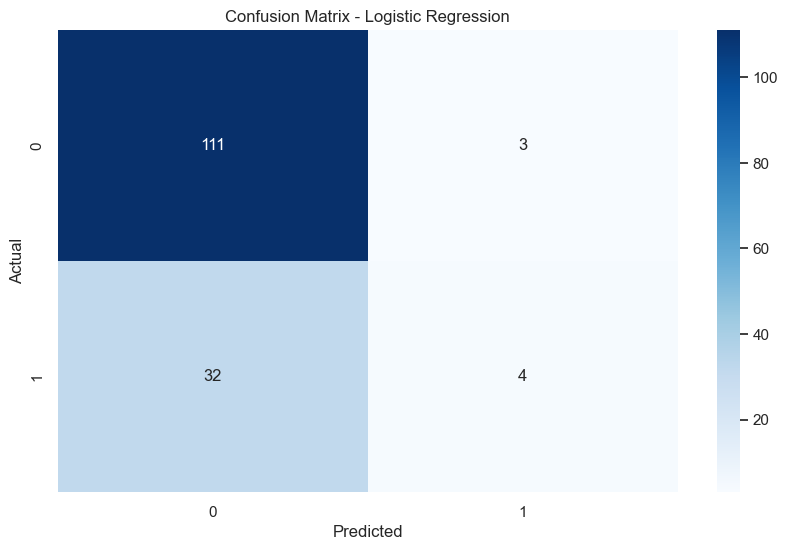

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       114
           1       0.57      0.11      0.19        36

    accuracy                           0.77       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.73      0.77      0.70       150

ROC-AUC Score: 0.7885

🔍 Evaluation Report for Random Forest
Confusion Matrix:


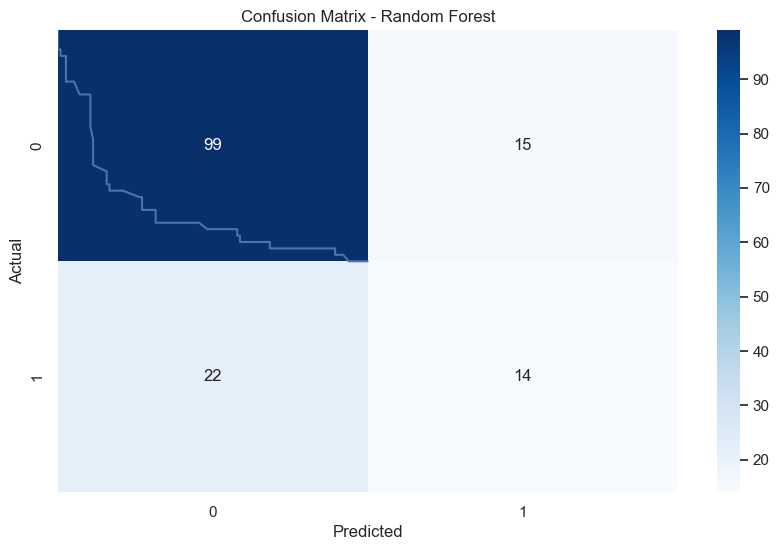

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       114
           1       0.48      0.39      0.43        36

    accuracy                           0.75       150
   macro avg       0.65      0.63      0.64       150
weighted avg       0.74      0.75      0.74       150

ROC-AUC Score: 0.7563

🔍 Evaluation Report for Support Vector Machine
Confusion Matrix:


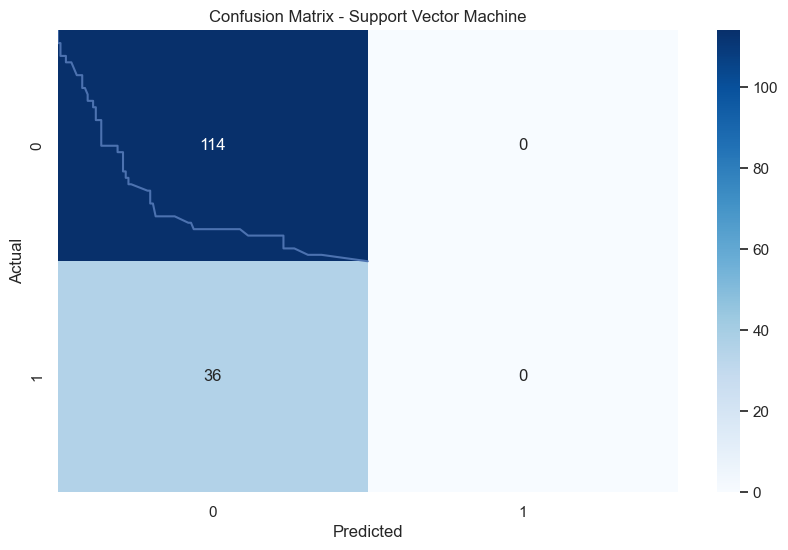

Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       114
           1       0.00      0.00      0.00        36

    accuracy                           0.76       150
   macro avg       0.38      0.50      0.43       150
weighted avg       0.58      0.76      0.66       150

ROC-AUC Score: 0.8226


C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

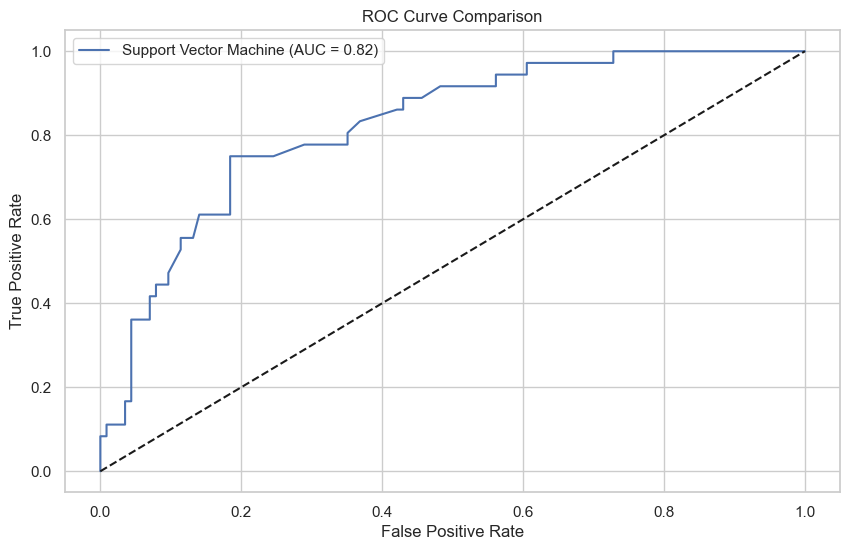

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate models on test data
evaluation_results = {}

for name, model in models.items():
    clf = model.fit(X_train_final, y_train)
    y_pred = clf.predict(X_test_final)
    y_proba = clf.predict_proba(X_test_final)[:, 1]

    print(f"\n🔍 Evaluation Report for {name}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    roc_auc = roc_auc_score(y_test, y_proba)
    evaluation_results[name] = roc_auc
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Final ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Personalized Recommendation Logic

In [10]:
# Let's use the best-performing model — for example, Random Forest
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_final, y_train)

# Recommendation function
def generate_recommendation(input_vector, model=best_model):
    """
    Returns a healthcare recommendation based on the predicted probability.
    """
    prob = model.predict_proba(input_vector)[0][1]  # Probability of Class = 1
    
    if prob >= 0.80:
        return f" High Risk ({prob*100:.1f}%) — Immediate lifestyle changes & consult a physician."
    elif prob >= 0.50:
        return f" Moderate Risk ({prob*100:.1f}%) — Regular check-up and moderate lifestyle adjustments."
    else:
        return f" Low Risk ({prob*100:.1f}%) — No immediate action required. Maintain current habits."

# Generate recommendation for the first test patient
sample = X_test_final.iloc[[0]]
print("Example Input (scaled):\n", sample)

recommendation = generate_recommendation(sample)
print("\n Personalized Recommendation:\n", recommendation)


Example Input (scaled):
     Recency  Frequency  Monetary      Time  Donation_Per_Month
0 -0.680679   1.795838  1.796842  0.152489            1.558226

 Personalized Recommendation:
  Moderate Risk (62.0%) — Regular check-up and moderate lifestyle adjustments.


# Streamlit App Deployment

In [11]:
import joblib
joblib.dump(best_model, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [12]:
%%writefile app.py
# Streamlit App for Personalized Healthcare Recommendations

import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model and scaler
model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# App title
st.title("🩸 Personalized Healthcare Recommendation System")
st.markdown("Enter patient data below to receive prediction and advice.")

# Input fields
recency = st.slider("Recency (months since last donation)", 0, 74, 2)
frequency = st.slider("Frequency (total donations)", 1, 50, 5)
monetary = st.slider("Monetary (total blood donated)", 250, 12500, 1000, step=250)
time = st.slider("Time (months since first donation)", 2, 99, 30)

# Prepare input
input_data = pd.DataFrame([[recency, frequency, monetary, time]], 
                          columns=["Recency", "Frequency", "Monetary", "Time"])

# Scale features
input_scaled = scaler.transform(input_data)

# Add derived feature
donation_per_month = frequency / (time + 1)
input_final = pd.DataFrame(input_scaled, columns=["Recency", "Frequency", "Monetary", "Time"])
input_final["Donation_Per_Month"] = donation_per_month

# Predict
if st.button("Get Recommendation"):
    prob = model.predict_proba(input_final)[0][1]
    prediction = model.predict(input_final)[0]

    st.subheader(f" Likely to Donate? {'Yes' if prediction == 1 else 'No'} ({prob*100:.2f}%)")

    # Recommendation logic
    if prob >= 0.80:
        st.error(" High Risk — Immediate lifestyle changes & consult a physician.")
    elif prob >= 0.50:
        st.warning(" Moderate Risk — Regular check-up & lifestyle improvements.")
    else:
        st.success(" Low Risk — No action required. Keep maintaining your health.")


Writing app.py


# Now open your terminal, navigate to the directory where the file is save and then try to run "streamlit run app.py".